# Question 1

**NOTE**: You cannot use any ready-to-use functionalities from numpy or any other libraries to compute convolution or circular convolution or anything that we asked you to implement from scratch! Although, you can use numpy's `np.sin`, `np.cos` and these basic functions with ease of mind and no problem!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part a

Implement a function to calculate the convolution of 2 discrete time signals. Then, plot the convolution of `sin(x)` and `cos(x)` for `x` as range of numbers from `0` to `2pi` divided in `100` parts.

In [ ]:
def convolution(signal1, signal2):
  """
  This function calculates the convolution of two discrete-time signals.

  Args:
      signal1: A list representing the first discrete-time signal.
      signal2: A list representing the second discrete-time signal.

  Returns:
      A list representing the convolution of signal1 and signal2.
  """

  # Length of the convolution result
  result_length = len(signal1) + len(signal2) - 1

  # Initialize the convolution result with zeros
  convolution_result = [0] * result_length

  # Iterate through all possible lags
  for i in range(result_length):
    # Reset the sum for each lag
    summation = 0
    # Calculate the dot product for a specific lag
    for j in range(max(0, i - len(signal2) + 1), min(len(signal1), i + 1)):
      summation += signal1[j] * signal2[i - j]
    # Store the dot product at the corresponding index in the result
    convolution_result[i] = summation

  return convolution_result

In [ ]:
# a simple test (your function will be still checked for correct logic, other than this test)
convolution([1, 2, 3, 4], [1, 2, 3, 4])

[1, 4, 10, 20, 25, 24, 16]

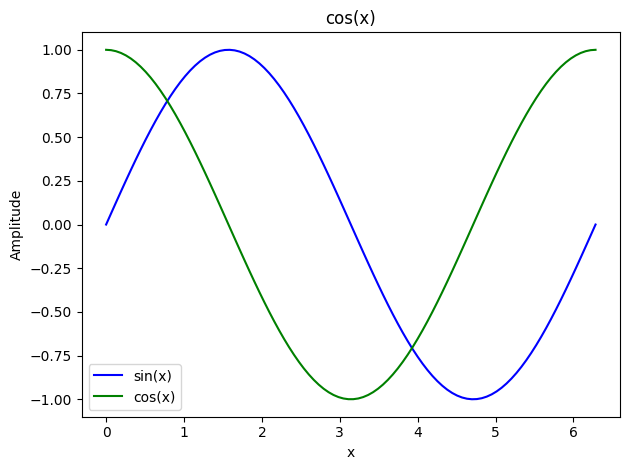

In [ ]:
# TODO: convolve sin(x) and cos(x) over the range of 0 to 2*pi divided into 100 points
# and plot each function seperately, and the result of convolution also
# Calculate the range of x from 0 to 2*pi divided in 100 parts
x = np.linspace(0, 2 * np.pi, 100)

# Define sin(x) and cos(x)
sin_x = np.sin(x)
cos_x = np.cos(x)

# Plot sin(x)
plt.plot(x, sin_x, label='sin(x)', color='blue')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('sin(x)')
plt.legend()

# Plot cos(x)
plt.plot(x, cos_x, label='cos(x)', color='green')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('cos(x)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

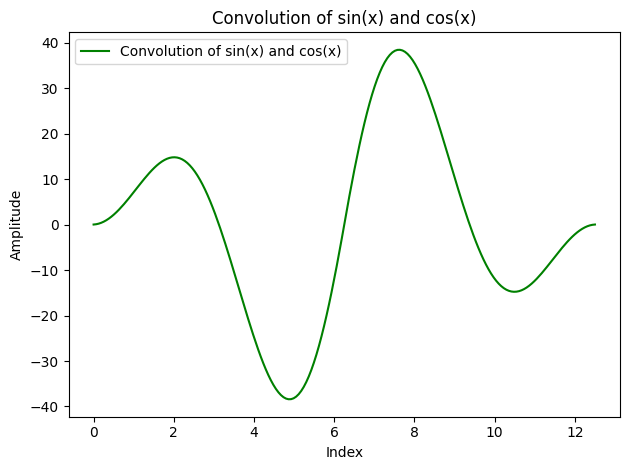

In [ ]:
# Calculate the range of x from 0 to 4*pi divided in 200 parts, then
# extract 199 out
x = np.linspace(0, 4 * np.pi, 200)[:-1]

# Calculate the convolution of sin(x) and cos(x)
convolution_result = convolution(sin_x, cos_x)

# Plot the result of convolution
plt.plot(x, convolution_result, label='Convolution of sin(x) and cos(x)', color='green')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Convolution of sin(x) and cos(x)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## Part b

Implement circular convolution of 2 discrete time signals. Then, plot the circular convolution of `sin(x)` and `cos(x)` for `x` as range of numbers from `0` to `2pi` divided in `100` parts.

In [ ]:
def circconv(x, y, N):
    # TODO: return the result of circular convolution of x and y (discrete-time)
    # among with analysis width = N

    # Make sure x and y are of length N
    if len(x) != N or len(y) != N:
        raise ValueError("x and y must both be length N")

    result = np.zeros(N)
    for n in range(N):
        for m in range(N):
            result[n] += x[m] * y[(n - m) % N]
    return result

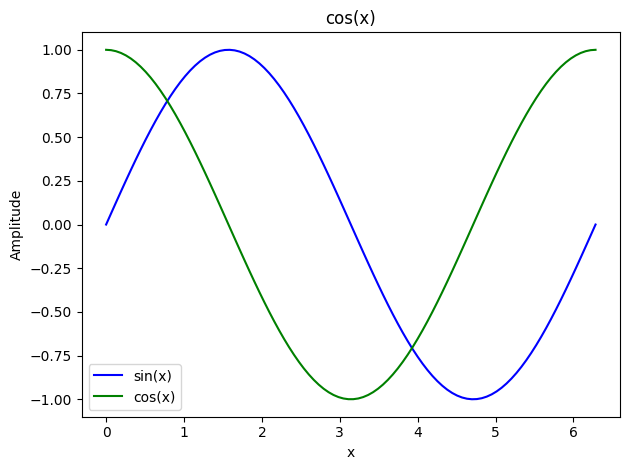

In [ ]:
# TODO: circular convolve sin(x) and cos(x) over the range of 0 to 2*pi divided into 100 points
# and plot each function seperately, and the result of circular convolution also
# Calculate the range of x from 0 to 2*pi divided in 100 parts
x = np.linspace(0, 2 * np.pi, 100)

# Define sin(x) and cos(x)
sin_x = np.sin(x)
cos_x = np.cos(x)

# Plot sin(x)
plt.plot(x, sin_x, label='sin(x)', color='blue')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('sin(x)')
plt.legend()

# Plot cos(x)
plt.plot(x, cos_x, label='cos(x)', color='green')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('cos(x)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

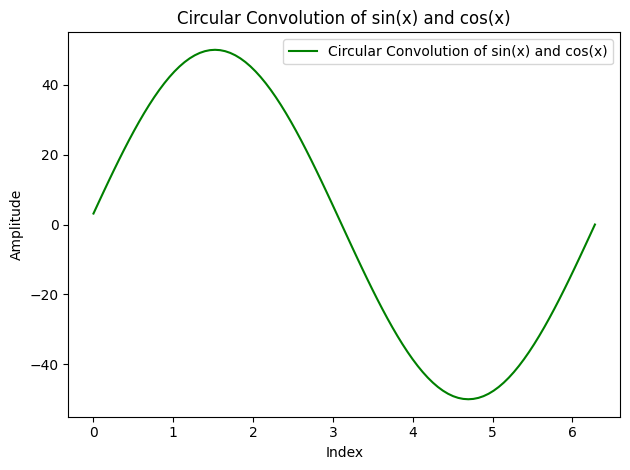

In [ ]:
# Calculate the convolution of sin(x) and cos(x)
convolution_result = circconv(sin_x, cos_x, len(x))

# Plot the result of convolution
plt.plot(x, convolution_result, label='Circular Convolution of sin(x) and cos(x)', color='green')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.title('Circular Convolution of sin(x) and cos(x)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Question 2

In this question, you should implement DCT from scratch (**without using any ready-to-use functionalities for this sake from numpy or other libraries**). Then, you should find basis images of DCT. We will use this basises to compress an image. To compress a given image, you should compute DCT of each block of the image, sort the DCT coefficients and keep the `n` largest coefficients. Then, reconstruct the compressed image and see how well DCT compressed your image and how lossy is this compression! Let's go.

**NOTE**: You **should not** use any ready-to-use functionalities for DCT from numpy or other libraries. You should implement DCT from scratch. you can use numpy for other functionalities like `np.cos`, `np.pi`, etc.

In [3]:
def mse_calculation(img, img_quantized):
    """Calculate the mean square error between two images.

    Parameters
    ----------
    img : array_like
        The original image.
    img_quantized : array_like
        The quantized image.

    Returns
    -------
    mse : float
        The mean square error between the two images.
    """
    # Initialize variables to store error and total number of pixels
    total_error = 0
    num_pixels = len(img) * len(img[0])  # Assuming rectangular images

    # Loop through each pixel and calculate squared error
    for row in range(len(img)):
        for col in range(len(img[0])):
            error = (img[row][col] - img_quantized[row][col]) ** 2
            total_error += error

    # Calculate and return the mean squared error
    return total_error / num_pixels

In [4]:
def compute_dct_basis(N):
    """
    This function, takes an integer N as input and returns a set of N^2 basis images,
    each of size (N, N). The basis images should be computed using the formula for the DCT basis functions.
    """
    basis = np.zeros((N, N, N, N))
    for u in range(N):
        for v in range(N):
            for x in range(N):
                for y in range(N):
                    alpha_u = np.sqrt(1/N) if u == 0 else np.sqrt(2/N)
                    alpha_v = np.sqrt(1/N) if v == 0 else np.sqrt(2/N)
                    basis[u, v, x, y] = alpha_u * alpha_v * \
                        np.cos((2 * x + 1) * u * np.pi / (2 * N)) * \
                        np.cos((2 * y + 1) * v * np.pi / (2 * N))
    return basis


In [5]:
compute_dct_basis(8).shape

(8, 8, 8, 8)

In [6]:
basis_images = compute_dct_basis(8)
basis_images.max()

0.24048494156391095

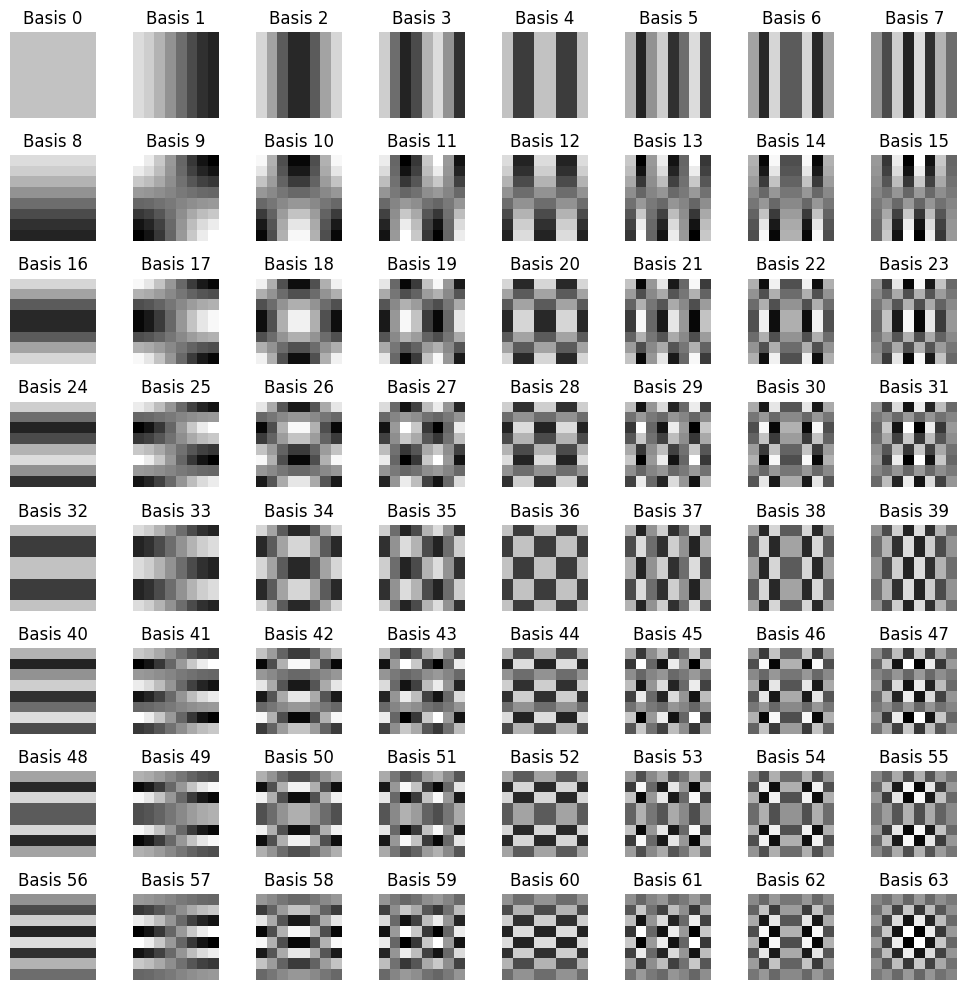

In [7]:
basis_images = compute_dct_basis(8)

# TODO: plot the first 64 basis images
# Function to plot DCT basis images
def plot_dct_basis(basis_images, num_plots_per_row=8):
    fig, axs = plt.subplots(num_plots_per_row, num_plots_per_row, figsize=(10, 10))

    for i in range(num_plots_per_row):
        for j in range(num_plots_per_row):
            axs[i, j].imshow(basis_images[i, j], vmin=basis_images.min(), vmax=basis_images.max(), cmap='gray', interpolation='nearest')
            axs[i, j].axis('off')
            axs[i, j].set_title(f'Basis {i * num_plots_per_row + j}')

    plt.tight_layout()
    plt.show()

# Plot the first few DCT basis images
plot_dct_basis(basis_images)

In [18]:
def compress_and_decompress_image(image, basis_images, n):
    """
    This function takes an image and a set of basis images and an integer n as input.
    It first, compresses the image by projecting it onto the first n basis images.
    (keeping n largest coefficients) and then reconstructs the image from the compressed image.
    """
    # TODO
    N = basis_images.shape[0]  # Assuming square basis images of size N x N
    height, width = image.shape
    compressed_image = np.zeros((height, width))
    decompressed_image = np.zeros((height, width))

    # Process each block
    for i in range(0, height, N):
        for j in range(0, width, N):
            block = image[i:i+N, j:j+N]
            # Compute DCT coefficients for this block
            dct_coeffs = np.zeros((N, N))
            for u in range(N):
                for v in range(N):
                    dct_coeffs[u, v] = np.sum(block * basis_images[u, v])

            # Keep only the largest 'n' coefficients
            # Flatten, sort indices by absolute value, zero out all but the largest 'n'
            flattened_coeffs = dct_coeffs.flatten()
            indices = np.argsort(-np.abs(flattened_coeffs))
            significant_indices = indices[:n]
            compressed_coeffs = np.zeros_like(flattened_coeffs)
            compressed_coeffs[significant_indices] = flattened_coeffs[significant_indices]
            compressed_coeffs = compressed_coeffs.reshape(N, N)

            # Store compressed coefficients (for visualization or other uses)
            compressed_image[i:i+N, j:j+N] = compressed_coeffs

            # Compute inverse DCT to reconstruct the block
            reconstructed_block = np.zeros((N, N))
            for u in range(N):
                for v in range(N):
                    reconstructed_block += compressed_coeffs[u, v] * basis_images[u, v]

            decompressed_image[i:i+N, j:j+N] = reconstructed_block

    return compressed_image, decompressed_image

In [19]:
def psnr(img, img_compressed):
    """
    Compute the peak signal-to-noise ratio (PSNR) between two images.

    Parameters:
    img (ndarray): The original image.
    img_compressed (ndarray): The compressed image.

    Returns:
    float: The peak signal-to-noise ratio between the two images.
    """
    # Calculate the mean square error (MSE) using the existing mse_calculation function
    mse = np.mean((img - img_compressed) ** 2)

    # Check if the mean square error is zero (perfect reconstruction)
    if mse == 0:
        # Return a high PSNR value if MSE is zero (infinity for perfect reconstruction)
        return float('inf')

    # Calculate the maximum possible pixel value of the image
    max_pixel_value = 255  # Assuming 8-bit images (grayscale images with values from 0 to 255)

    # Calculate PSNR
    psnr_value = 20 * np.log10(max_pixel_value / np.sqrt(mse))

    return psnr_value

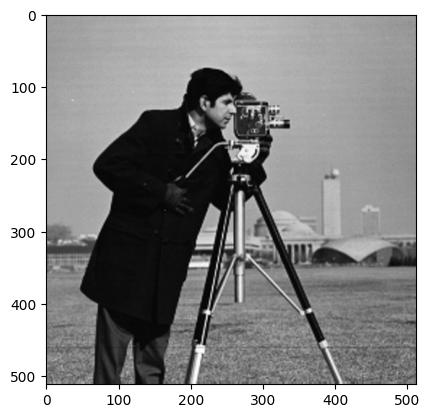

In [20]:
img = plt.imread("./cameraman.png")

plt.imshow(img, cmap="gray")

In [ ]:
img = (img * 255).round().astype(np.uint8)

In [12]:
img

array([[0.6117647 , 0.6156863 , 0.627451  , ..., 0.59607846, 0.59607846,
        0.59607846],
       [0.6117647 , 0.6156863 , 0.62352943, ..., 0.59607846, 0.59607846,
        0.59607846],
       [0.61960787, 0.6156863 , 0.6117647 , ..., 0.59607846, 0.59607846,
        0.59607846],
       ...,
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313726,
        0.43529412],
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313726,
        0.43529412],
       [0.4745098 , 0.48235294, 0.49411765, ..., 0.4745098 , 0.44313726,
        0.43529412]], dtype=float32)

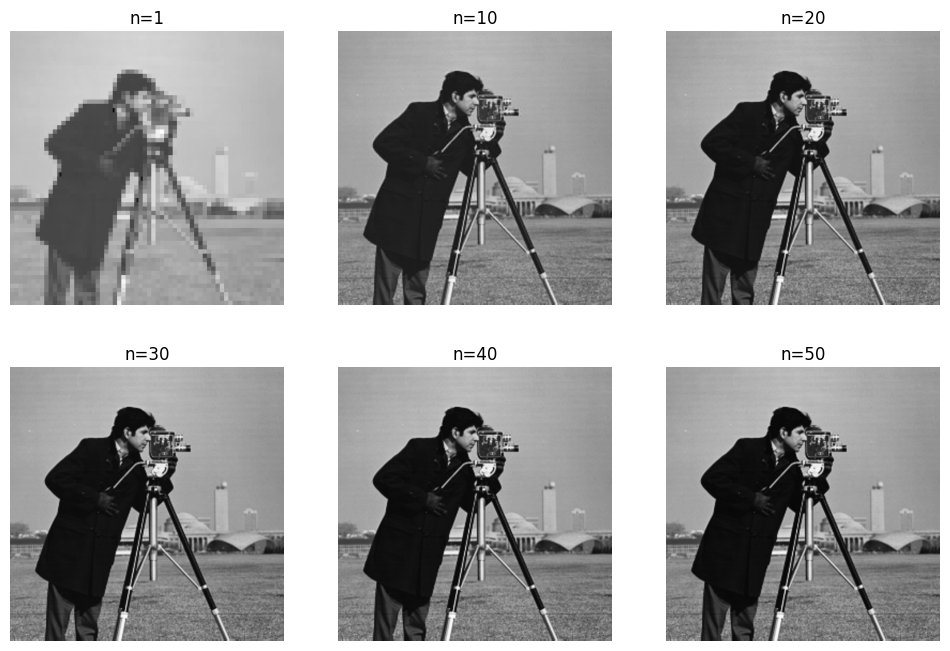

In [29]:
# Compress the given image using your function "compress_and_decompress_image"
# and plot the reconstructed images for n = 1, 10, 20, 30, 40, 50
# TODO

_, decom1 = compress_and_decompress_image(img, basis_images, 1)
_, decom10 = compress_and_decompress_image(img, basis_images, 10)
_, decom20 = compress_and_decompress_image(img, basis_images, 20)
_, decom30 = compress_and_decompress_image(img, basis_images, 30)
_, decom40 = compress_and_decompress_image(img, basis_images, 40)
_, decom50 = compress_and_decompress_image(img, basis_images, 50)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(decom1, cmap='gray')
plt.axis(False)
plt.title('n=1')

plt.subplot(2, 3, 2)
plt.imshow(decom10, cmap='gray')
plt.axis(False)
plt.title('n=10')

plt.subplot(2, 3, 3)
plt.imshow(decom20, cmap='gray')
plt.axis(False)
plt.title('n=20')

plt.subplot(2, 3, 4)
plt.imshow(decom30, cmap='gray')
plt.axis(False)
plt.title('n=30')

plt.subplot(2, 3, 5)
plt.imshow(decom40, cmap='gray')
plt.axis(False)
plt.title('n=40')

plt.subplot(2, 3, 6)
plt.imshow(decom50, cmap='gray')
plt.axis(False)
plt.title('n=50')

plt.show()

[0.0059710461075304444, 0.00017738632634780064, 2.5658304007406e-05, 4.752887575245767e-06, 8.688087744657978e-07, 1.0571920474081228e-07]


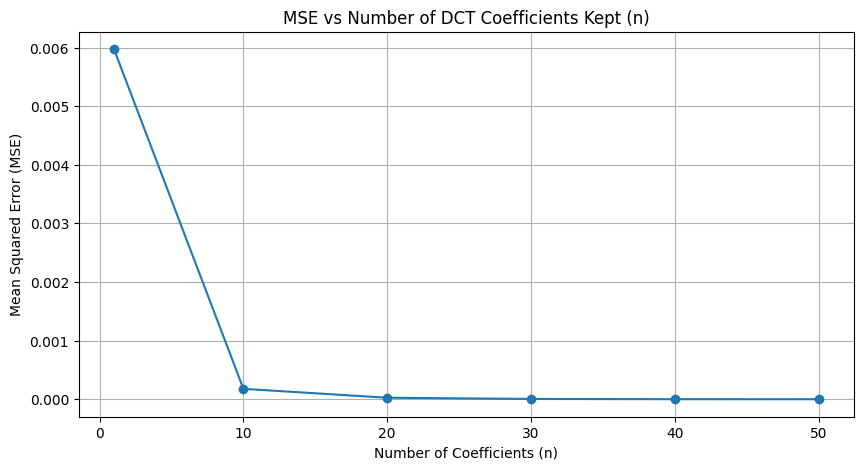

In [30]:
# Compute the MSE between the input image and the output image for each value of n.
# Plot the MSE as a function of n.

#TODO
def plot_mse_vs_n(image, basis_images, ns):
    """Plot MSE as a function of n for the image compression."""
    mses = []

    for n in ns:
        compressed_image, decompressed_image = compress_and_decompress_image(image, basis_images, n)
        mse = mse_calculation(image, decompressed_image)
        mses.append(mse)

    print(mses)

    # Plotting the MSE values
    plt.figure(figsize=(10, 5))
    plt.plot(ns, mses, marker='o', linestyle='-')
    plt.title('MSE vs Number of DCT Coefficients Kept (n)')
    plt.xlabel('Number of Coefficients (n)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid(True)
    plt.show()

plot_mse_vs_n(img, basis_images, [1, 10, 20, 30, 40, 50])

[32.56030318814264, 38.868306444901876, 45.866059701995844, 53.07589235965308, 60.778968585178916, 74.5130297067942]


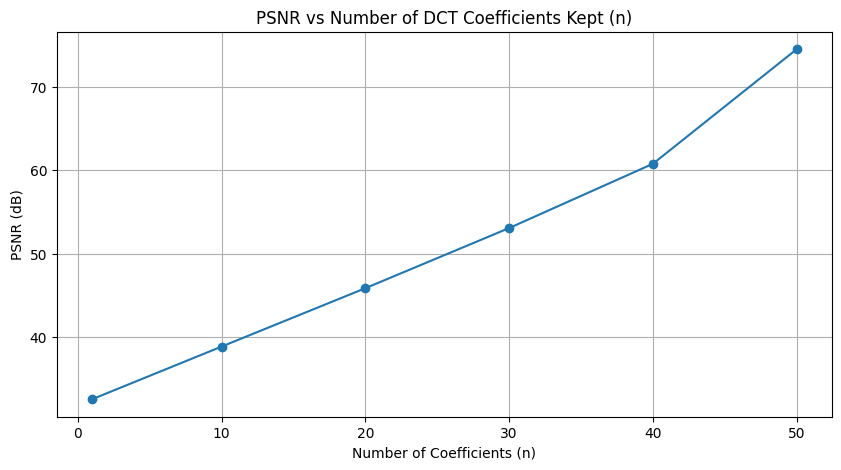

In [32]:
# Compute the PSNR between the input image and the output image for each value of n.
# Plot the PSNR as a function of n.

#TODO
def plot_psnr_vs_n(image, basis_images, ns):
    psnrs = []

    image_uint8 = (image * 255).round().astype(np.uint8)
    for n in ns:
        _, decompressed_image = compress_and_decompress_image(image, basis_images, n)
        decompressed_image_uint8 = (decompressed_image * 255).round().astype(np.uint8)
        psnr_value = psnr(image_uint8, decompressed_image_uint8)
        psnrs.append(psnr_value)

    print(psnrs)

    # Plotting the PSNR values
    plt.figure(figsize=(10, 5))
    plt.plot(ns, psnrs, marker='o', linestyle='-')
    plt.title('PSNR vs Number of DCT Coefficients Kept (n)')
    plt.xlabel('Number of Coefficients (n)')
    plt.ylabel('PSNR (dB)')
    plt.grid(True)
    plt.show()

plot_psnr_vs_n(img, basis_images, [1, 10, 20, 30, 40, 50])